In [1]:
import pandas as pd

# Load the CSV file to examine its contents
file_path = r'C:\Users\jusep\Downloads\Telegram Desktop\manhattan.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe to understand its structure and contents
df.head()


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Preprocessing data  

In [16]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values
# Missing Values: There are no missing values in any of the columns. This indicates a complete dataset with no missing information.

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [17]:
# Checking for duplicate entries
duplicate_entries = df.duplicated().sum()
duplicate_entries
# Duplicate Entries: There are no duplicate entries in the dataset. Each entry is unique.

0

In [18]:
# Statistical summary of numerical columns
statistical_summary = df.describe().T

round(statistical_summary,1)
# Rent: Varies significantly, from $1,300 to $20,000, with a mean of $5,138.94.
# Bedrooms and Bathrooms: Ranges from 0 to 5.
# Size (sqft): Ranges from 250 to 4,800 square feet, with an average size of approximately 940 sqft.
# Minutes to Subway: Varies from 0 to 43 minutes, with an average of about 5 minutes.
# Building Age (Years): The age of buildings varies widely, from new constructions to 180 years old, with an average age of around 52 years.

,count,mean,std,min,25%,50%,75%,max
rental_id,3539.0,5332.6,3311.6,1.0,2443.5,5128.0,8149.5,11349.0
rent,3539.0,5138.9,3162.8,1300.0,3150.0,4000.0,6000.0,20000.0
bedrooms,3539.0,1.4,1.0,0.0,1.0,1.0,2.0,5.0
bathrooms,3539.0,1.4,0.6,0.0,1.0,1.0,2.0,5.0
size_sqft,3539.0,939.7,477.9,250.0,613.0,800.0,1141.0,4800.0
min_to_subway,3539.0,5.0,5.5,0.0,2.0,4.0,6.0,43.0
floor,3539.0,11.9,11.0,0.0,4.0,8.0,17.0,83.0
building_age_yrs,3539.0,52.0,39.4,0.0,15.0,39.0,90.0,180.0
no_fee,3539.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
has_roofdeck,3539.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the aesthetics for the plots
sns.set(style="whitegrid")


These visualizations provide a comprehensive overview of key factors affecting the Manhattan rental market. They highlight the diversity in rent prices, property sizes, and building ages, as well as the significant differences in rental prices across neighborhoods

Text(0, 0.5, 'Frequency')

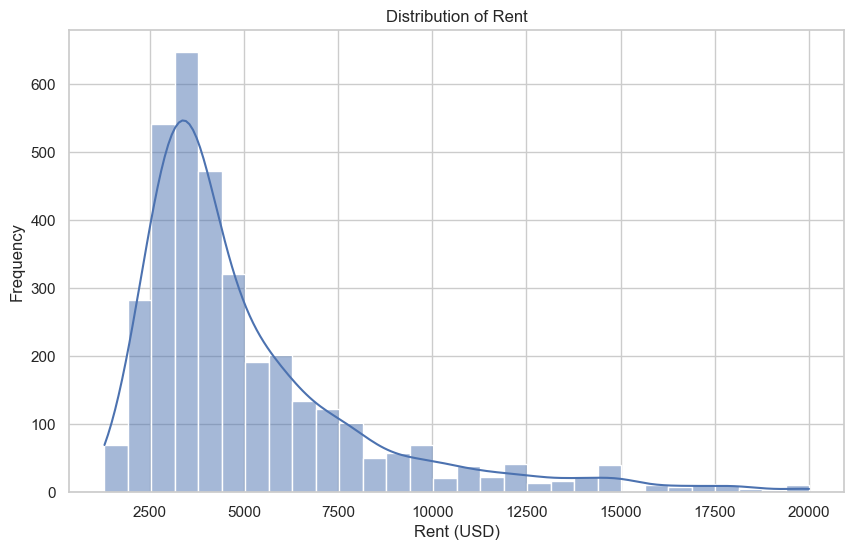

In [27]:
# Plot 1: Rent distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rent'], bins=30, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent (USD)')
plt.ylabel('Frequency')

# The rent distribution shows a right-skewed pattern, indicating that most rentals are in the lower to middle price range, with a few high-priced outliers.


Text(0, 0.5, 'Rent (USD)')

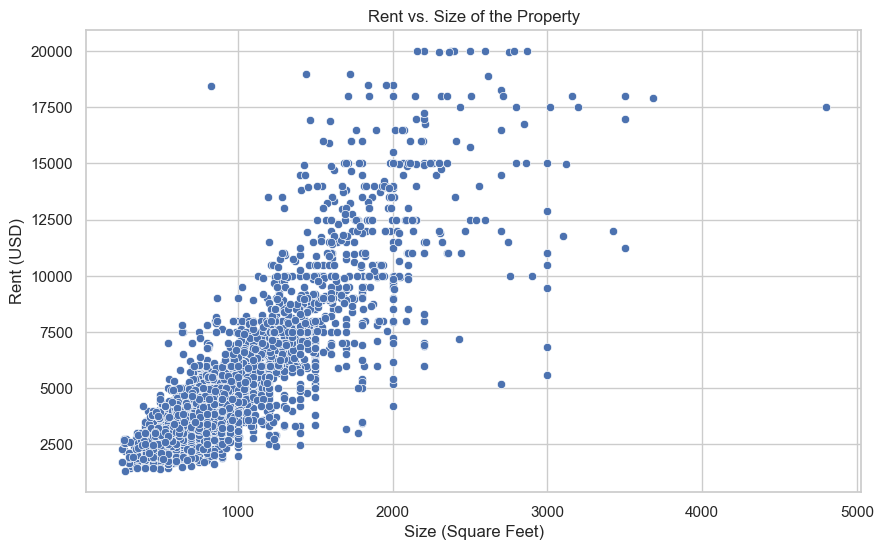

In [28]:
# Plot 2: Relationship between Rent and Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size_sqft', y='rent', data=df)
plt.title('Rent vs. Size of the Property')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Rent (USD)')
# There is a positive correlation between the size of the property (in square feet) and the rent. Larger properties tend to have higher rent.

Text(0, 0.5, 'Neighborhood')

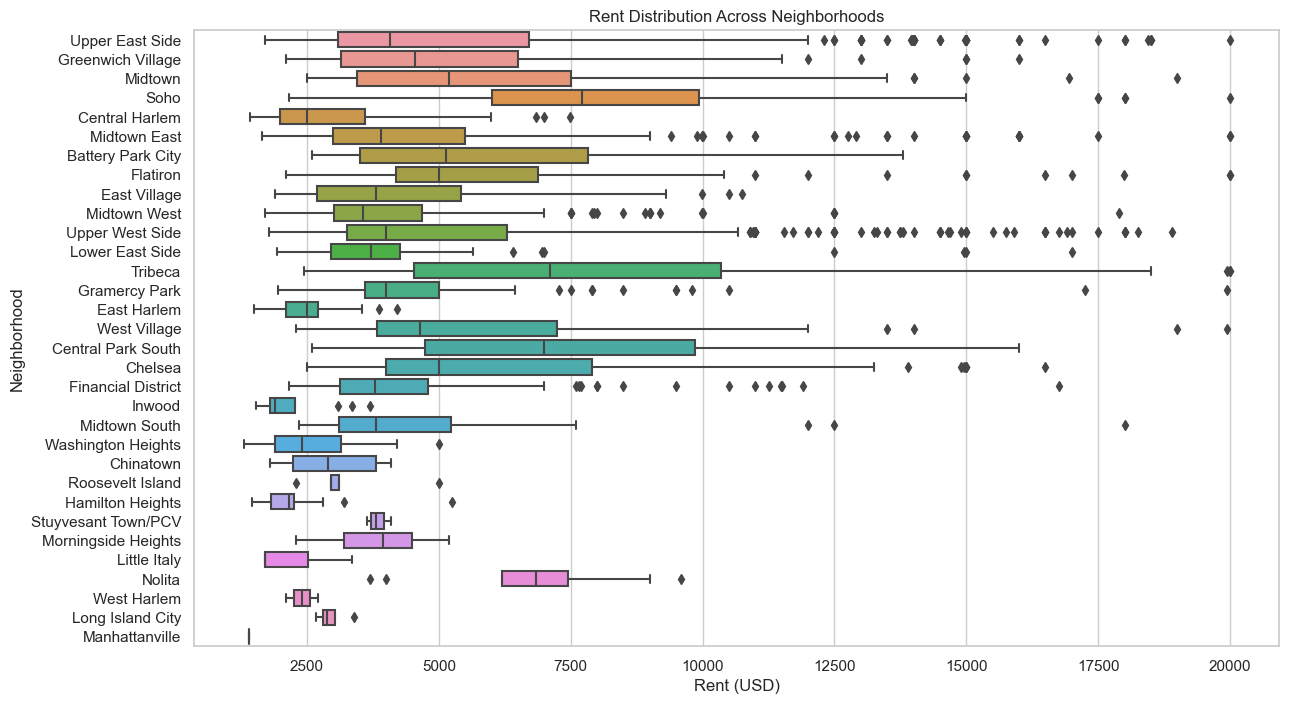

In [29]:
# Plot 3: Rent distribution across Neighborhoods
plt.figure(figsize=(14, 8))
sns.boxplot(x='rent', y='neighborhood', data=df, orient='h')
plt.title('Rent Distribution Across Neighborhoods')
plt.xlabel('Rent (USD)')
plt.ylabel('Neighborhood')

# The boxplot across neighborhoods shows significant variation in median rents and the range of rents in different neighborhoods. Some neighborhoods have higher median rents and more high-priced rentals, indicating more upscale areas.

Text(0, 0.5, 'Frequency')

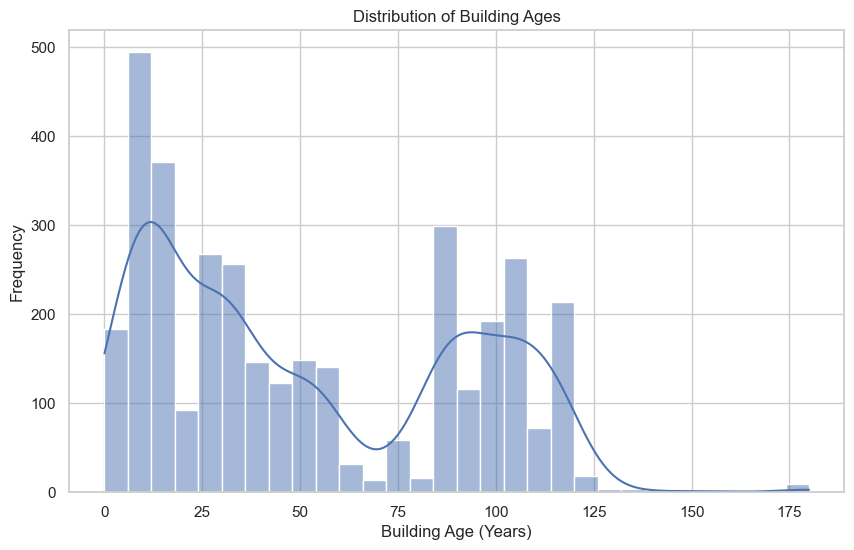

In [30]:
# Plot 4: Building Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['building_age_yrs'], bins=30, kde=True)
plt.title('Distribution of Building Ages')
plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency')

# The distribution of building ages shows a wide range, with a significant number of both newer and very old buildings. This diversity reflects the architectural history of Manhattan.

Text(0, 0.5, 'Rent (USD)')

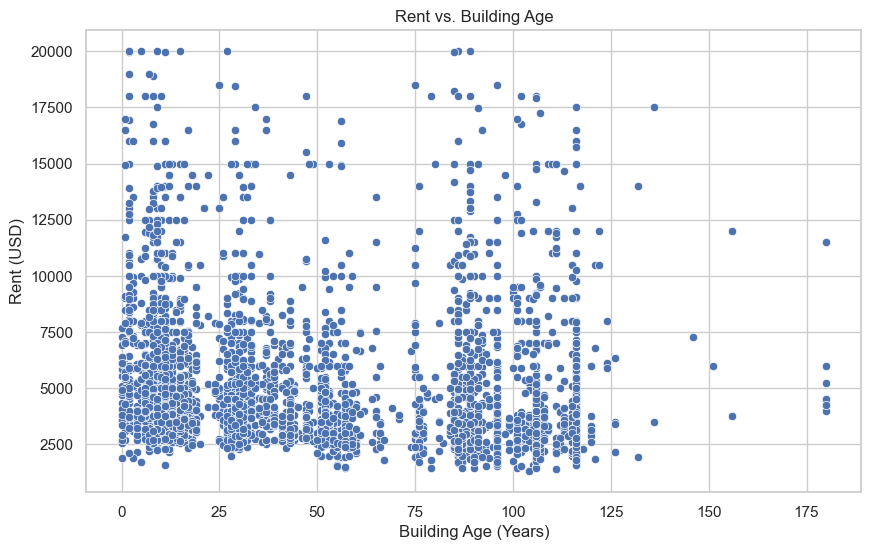

In [31]:
# Plot 5: Rent vs. Building Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='building_age_yrs', y='rent', data=df)
plt.title('Rent vs. Building Age')
plt.xlabel('Building Age (Years)')
plt.ylabel('Rent (USD)')

# The scatter plot of rent versus building age does not show a clear trend. Both old and new buildings can have high or low rents, suggesting that factors other than age (like location, amenities, and size) might be more influential in determining rent.


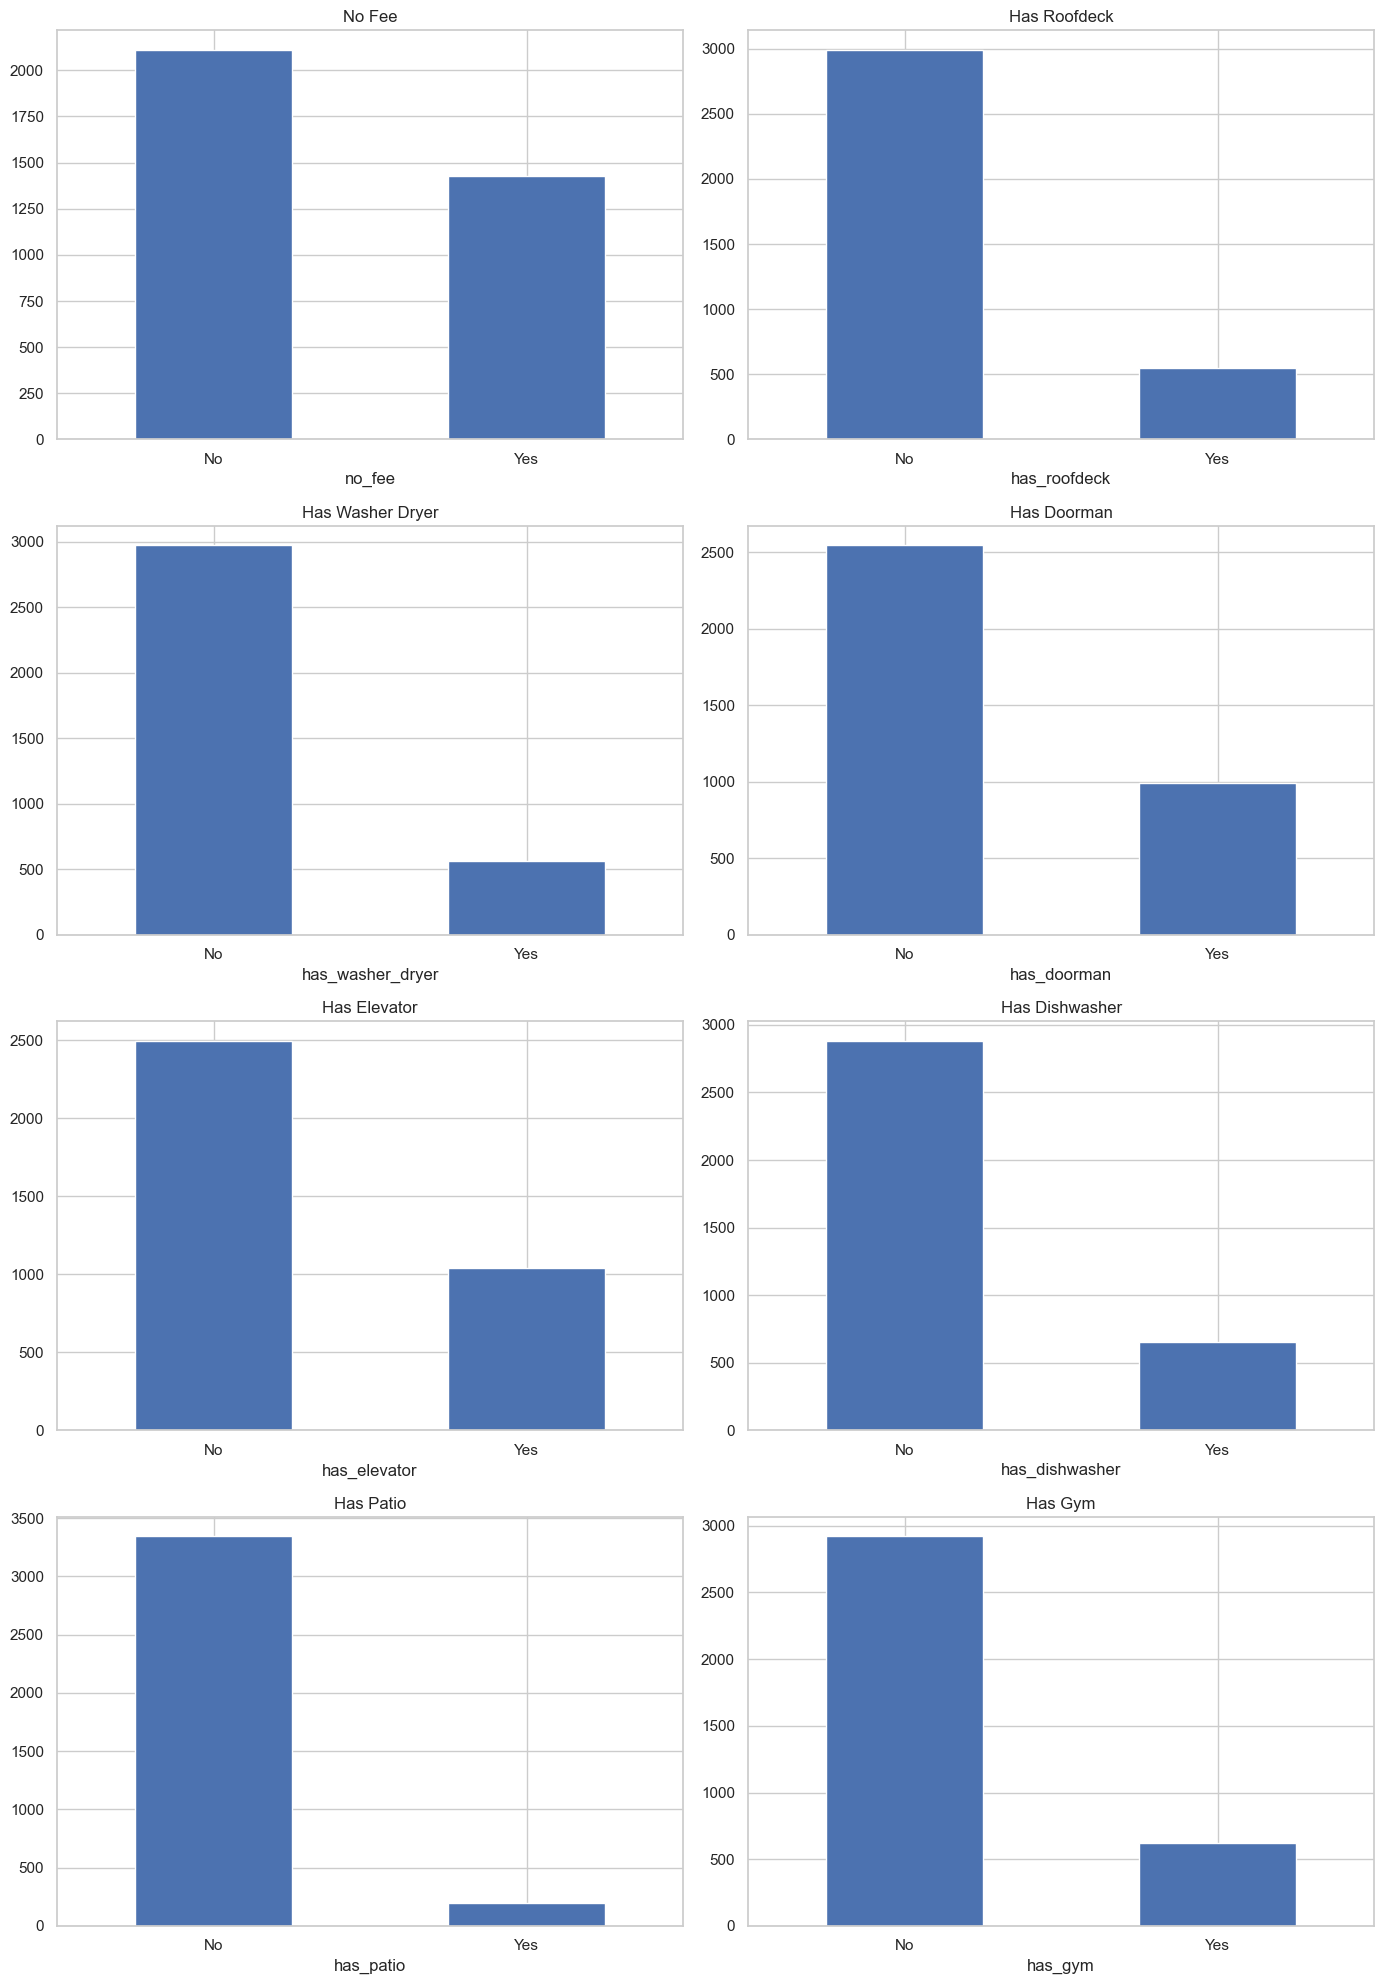

In [8]:
# Graphing categorical variables using bar graph

# Categorical variables selected: 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 
# 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym'

# Creating bar graphs for the same variables
fig, axes = plt.subplots(4, 2, figsize=(14, 20))

# Loop through the variables and create bar graphs
for i, var in enumerate(categorical_vars):
    ax = axes[i//2, i%2]
    df[var].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(var.replace('_', ' ').title())
    ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
# Creating a descriptive summary table for continuous variables

# Selecting continuous variables
continuous_variables = ['rent', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs']

# Generating descriptive statistics
descriptive_stats = df[continuous_variables].describe()

# Transposing the table for better readability
descriptive_summary_table = descriptive_stats.transpose()

# Displaying the descriptive summary table
descriptive_summary_table


,count,mean,std,min,25%,50%,75%,max
rent,3539.0,5138.940379,3162.824760,1300.0,3150.0,4000.0,6000.0,20000.0
size_sqft,3539.0,939.727324,477.949074,250.0,613.0,800.0,1141.0,4800.0
min_to_subway,3539.0,4.970896,5.513589,0.0,2.0,4.0,6.0,43.0
floor,3539.0,11.908307,10.960893,0.0,4.0,8.0,17.0,83.0
building_age_yrs,3539.0,51.994914,39.380433,0.0,15.0,39.0,90.0,180.0
